In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

plt.style.use('seaborn-whitegrid')

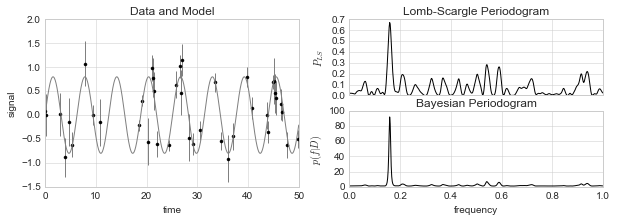

In [2]:
fig = plt.figure(figsize=(10, 3))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)

rng = np.random.RandomState(15566)
t = 50 * rng.rand(40)
dy = 0.1 + 0.4 * rng.rand(len(t))
y = f(t) + dy * rng.randn(len(t))
tfit = np.linspace(0, 50, 1000)

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=1,
                       samples_per_peak=10)
p = np.exp(p)



ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 1),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('fig24_bayesian_periodogram.pdf')